In [0]:
# Importando as biblioteca não disponíveis no COLAB =  Basemap e Georaster (Responsável pela leitura do arquivo Geotiff)

!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!apt install libproj-dev libgeos-dev
!sudo pip3 install -U git+https://github.com/matplotlib/basemap.git
!pip install georaster

In [0]:
# Usando a função !wget para baixarmos o repositório do Github.

!wget https://github.com/vlsantos-bit/Exemplos_radar_livro/archive/master.zip

In [0]:
#Função Unzip. responsável pela descompactação do repositório no script;

!unzip master.zip

In [0]:
#Importando ás bibliotecas

from pyproj import Proj
import georaster
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

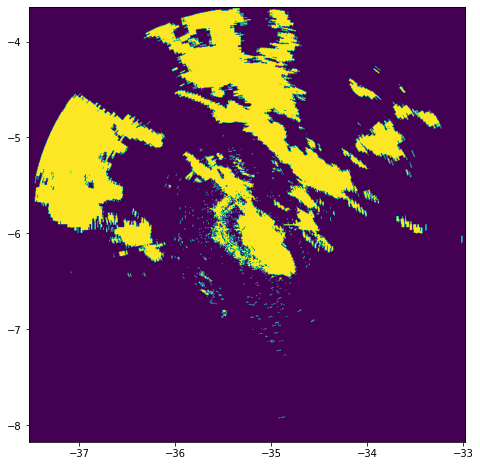

In [19]:
# Visualização da imagem dísponibilizada pelo RADAR 

#Plotando imagem geotiff


# A função SingleBand Raster corresponde a leitura de uma única faixa de dados. Formato encontrado nos dados dísponíveis no CEMADEN.
image = georaster.SingleBandRaster('Exemplos_radar_livro-master/natal_ACC_250km_01h_20200428203003.tif')
print(image)
fig = plt.figure(figsize=(8,8))

# "ímge.r" corresponde a plotagem da figura Georeferênciada
plt.imshow(image.r, extent=image.extent)
plt.show()


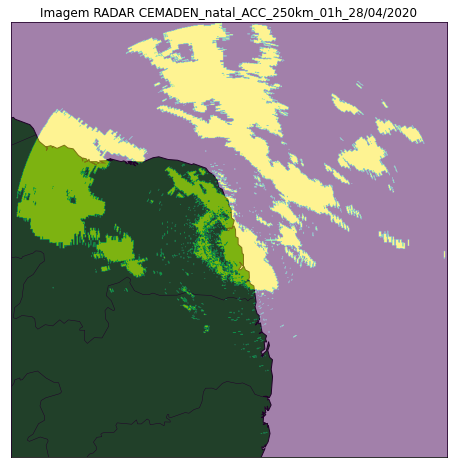

In [21]:
# Melhoramento da informação

## Incluindo basemap na imagem tiff... Radar Natal - ES

dado = r"Exemplos_radar_livro-master/natal_ACC_250km_01h_20200428203003.tif"
fig = plt.figure(figsize=(8,8))

# A função Load_data = False, possibilita o usuário obter  a matriz com as referência geográfica dos dados sem carregar a imagem
my_image = georaster.SingleBandRaster(dado, load_data=False)


#Definindo os limites lat e lon dísponíveis no arquivo Geotiff
minx, maxx, miny, maxy = my_image.extent

#Construindo a projeção geográfica onde a informação georeferenciada será inserida
m = Basemap(projection='cyl',llcrnrlon=minx,llcrnrlat=miny,urcrnrlon=maxx,urcrnrlat=maxy,resolution='i')

m.drawcoastlines()
m.fillcontinents(color='green')
m.drawstates()

#Gerando a plotagem 
image = georaster.SingleBandRaster(dado,load_data=(minx, maxx, miny, maxy),latlon=True)

plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=10, alpha=0.5)
plt.title("Imagem RADAR CEMADEN_natal_ACC_250km_01h_28/04/2020")
plt.show()


In [0]:
# Explorando dados hf5 - Uma maneira mais refinada de obter às informacões do radar Dual Polarimétrico 

#Instando biblioteca wradlib 
!pip install wradlib

In [0]:
# importando as bibliotecas
import wradlib as wrl
import pylab as pl

In [0]:
####Dados Baixado - Radar Dual Polarímétrico Maceio vol_250km_13steps #########

#Exemplos_radar_livro-master/2020050606400300KDP.vol.h5  
#Exemplos_radar_livro-master/2020050606400300PhiDP.vol.h5  
#Exemplos_radar_livro-master/2020050606400300RhoHV.vol.h5  
#Exemplos_radar_livro-master/2020050606400300V.vol.h5  
#Exemplos_radar_livro-master/2020050606400300W.vol.h5  
#Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5  
#Exemplos_radar_livro-master/2020050606400300dBZ.vol.h5  
#Exemplos_radar_livro-master/2020050606400300dBuZ.vol.h5  

In [78]:
filename =('Exemplos_radar_livro-master/2020050606400300dBZ.vol.h5')

# Função "ío.read_opera_hdf5" responsável pela leitura do arquivo hdf5
dado_rad = wrl.io.read_opera_hdf5(filename)

#Visualizando a estrutura dos dados 
print(dado_rad.keys())
print(dado_rad['dataset1/data1/data'])

dict_keys(['dataset1/data1/data', 'dataset1/data1/what', 'dataset1/how', 'dataset1/what', 'dataset1/where', 'dataset10/data1/data', 'dataset10/data1/what', 'dataset10/how', 'dataset10/what', 'dataset10/where', 'dataset11/data1/data', 'dataset11/data1/what', 'dataset11/how', 'dataset11/what', 'dataset11/where', 'dataset12/data1/data', 'dataset12/data1/what', 'dataset12/how', 'dataset12/what', 'dataset12/where', 'dataset13/data1/data', 'dataset13/data1/what', 'dataset13/how', 'dataset13/what', 'dataset13/where', 'dataset2/data1/data', 'dataset2/data1/what', 'dataset2/how', 'dataset2/what', 'dataset2/where', 'dataset3/data1/data', 'dataset3/data1/what', 'dataset3/how', 'dataset3/what', 'dataset3/where', 'dataset4/data1/data', 'dataset4/data1/what', 'dataset4/how', 'dataset4/what', 'dataset4/where', 'dataset5/data1/data', 'dataset5/data1/what', 'dataset5/how', 'dataset5/what', 'dataset5/where', 'dataset6/data1/data', 'dataset6/data1/what', 'dataset6/how', 'dataset6/what', 'dataset6/where',

In [79]:
# Visualiando as estruturas de classes principais do arquivo
print(dado_rad['where'])
print(dado_rad['how'])

{'height': 78.0, 'lat': -5.90448, 'lon': -35.25401}
{'beamwidth': 0.972, 'highprf': 600, 'lowprf': 480, 'software': b'RAINBOW', 'startepochs': 1588747203, 'stopepochs': 1588747658, 'system': b'NT1-P', 'wavelength': 10.714}


In [0]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from metpy.plots import ctables

Text(0.5, 1.0, 'Radar Dual Polarímétrico Natal vol_250km_13steps - dBZ.vol')

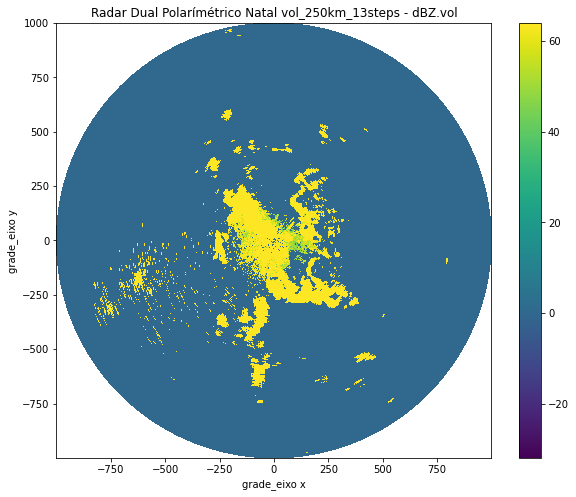

In [133]:
# Plotando dado de Dbz PPI. Observação, valores plotados no na legenda diferem do resultado, esse problema ocorre no tipo de formato do dado.

fig = plt.figure(figsize=(10,8))

# Gerando uma plotagem PPI usando a função "'vis.plot_ppi"
ax,im = wrl.vis.plot_ppi(dado_rad['dataset1/data1/data'], vmin=-32., vmax=64., fig=fig)

ylabel = ax.set_xlabel('grade_eixo x')
ylabel = ax.set_ylabel('grade_eixo y')
# Inserindo tabela de cor 
plt.colorbar(im, ax=ax)

plt.title('Radar Dual Polarímétrico Natal vol_250km_13steps - dBZ.vol')

Text(0.5, 1.0, 'Radar Dual Polarímétrico Natal vol_250km_13steps - dBZ.vol')

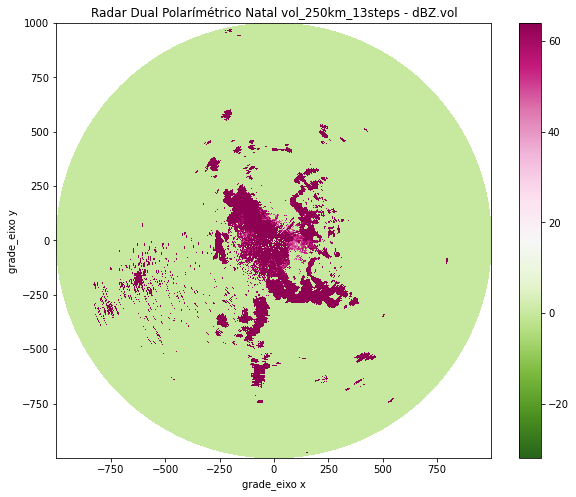

In [138]:
# Alterando a cor da sua plotagem 

fig = plt.figure(figsize=(10,8))

# Gerando uma plotagem PPI usando a função "'vis.plot_ppi"
ax,im = wrl.vis.plot_ppi(dado_rad['dataset1/data1/data'], vmin=-32., vmax=64., fig=fig, cmap = 'PiYG_r')

ylabel = ax.set_xlabel('grade_eixo x')
ylabel = ax.set_ylabel('grade_eixo y')
# Inserindo tabela de cor 
plt.colorbar(im, ax=ax)

plt.title('Radar Dual Polarímétrico Natal vol_250km_13steps - dBZ.vol')

Text(0.5, 1.0, 'Radar Dual Polarímétrico Natal vol_250km_13steps - dBZ.vol')

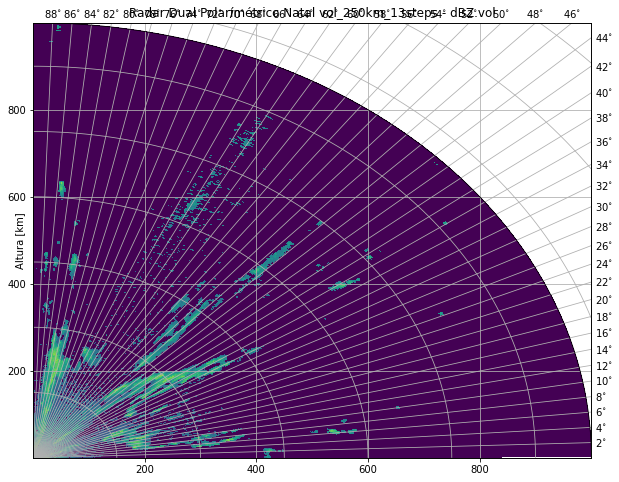

In [136]:
# Plotando dado de Dbz RHI, 

fig = plt.figure(figsize=(10,8))

# Gerando uma plotagem PPI usando a função "'vis.plot_ppi"
ax,im = wrl.vis.plot_rhi(dado_rad['dataset1/data1/data'],fig=fig,proj='cg')
ylabel = ax.set_ylabel('Altura [km]')
# Inserindo tabela de cor 

plt.title('Radar Dual Polarímétrico Natal vol_250km_13steps - dBZ.vol')

In [38]:
filename1 =('Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5')
dado_rad2 = wrl.io.read_opera_hdf5(filename1)
print(dado_rad.keys())
print(dado_rad['dataset1/data1/data'])

dict_keys(['dataset1/data1/data', 'dataset1/data1/what', 'dataset1/how', 'dataset1/what', 'dataset1/where', 'dataset10/data1/data', 'dataset10/data1/what', 'dataset10/how', 'dataset10/what', 'dataset10/where', 'dataset11/data1/data', 'dataset11/data1/what', 'dataset11/how', 'dataset11/what', 'dataset11/where', 'dataset12/data1/data', 'dataset12/data1/what', 'dataset12/how', 'dataset12/what', 'dataset12/where', 'dataset13/data1/data', 'dataset13/data1/what', 'dataset13/how', 'dataset13/what', 'dataset13/where', 'dataset2/data1/data', 'dataset2/data1/what', 'dataset2/how', 'dataset2/what', 'dataset2/where', 'dataset3/data1/data', 'dataset3/data1/what', 'dataset3/how', 'dataset3/what', 'dataset3/where', 'dataset4/data1/data', 'dataset4/data1/what', 'dataset4/how', 'dataset4/what', 'dataset4/where', 'dataset5/data1/data', 'dataset5/data1/what', 'dataset5/how', 'dataset5/what', 'dataset5/where', 'dataset6/data1/data', 'dataset6/data1/what', 'dataset6/how', 'dataset6/what', 'dataset6/where',

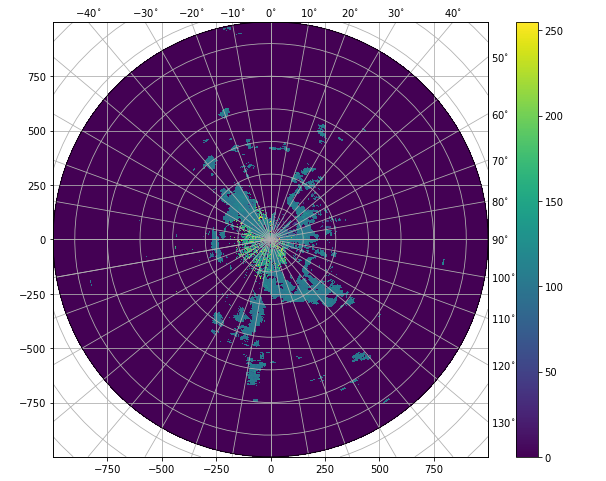

In [99]:
# valor da coluna é correspondente ao encontrado no dado
fig = plt.figure(figsize=(10,8))
# Inserir função proj = 'cg' inserindo malha na imagem de radar 
ax,im2 = wrl.vis.plot_ppi(dado_rad2['dataset1/data1/data'], proj='cg',fig=fig)
plt.colorbar(im2)

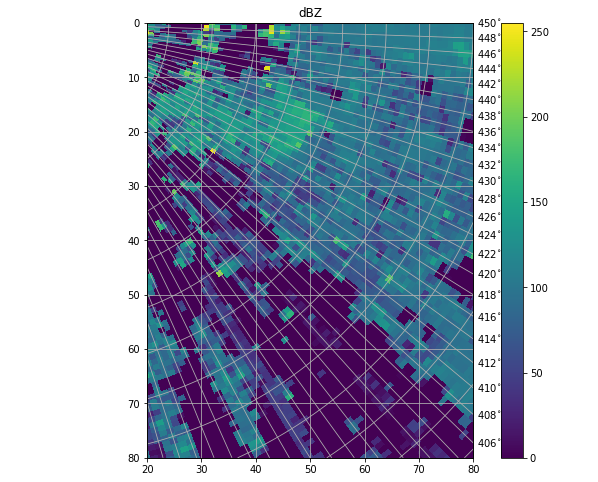

In [135]:
  ####Inserindo zoom 
fig = plt.figure(figsize=(10,8))
ax, im= wrl.vis.plot_ppi(dado_rad2['dataset1/data1/data'], proj='cg',fig=fig)
plt.colorbar(im)
plt.title('dBZ')
# Dando zom em uma determinada área do radar.
xlim = ax.set_xlim(20, 80)
ylim = ax.set_ylim(80, 0)

In [0]:
# Utilizando a biblioteca gdal 
from osgeo import gdal

In [73]:
dado = gdal.Open("Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5") 
#visualozando a estrutura dos dados 
dado.GetSubDatasets()

[('HDF5:"Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5"://dataset1/data1/data',
  '[360x1000] //dataset1/data1/data (8-bit unsigned character)'),
 ('HDF5:"Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5"://dataset10/data1/data',
  '[360x1000] //dataset10/data1/data (8-bit unsigned character)'),
 ('HDF5:"Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5"://dataset11/data1/data',
  '[360x1000] //dataset11/data1/data (8-bit unsigned character)'),
 ('HDF5:"Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5"://dataset12/data1/data',
  '[360x1000] //dataset12/data1/data (8-bit unsigned character)'),
 ('HDF5:"Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5"://dataset13/data1/data',
  '[360x1000] //dataset13/data1/data (8-bit unsigned character)'),
 ('HDF5:"Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5"://dataset2/data1/data',
  '[360x1000] //dataset2/data1/data (8-bit unsigned character)'),
 ('HDF5:"Exemplos_radar_livro-master/2